# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [4]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np


# Create two new dataframes
northcallcenter_df = pd.read_csv(r'C:\Users\bccut\OneDrive\Desktop\LaunchCode\call-center-cleanup-assignment\call-center-cleanup-assignment\NorthCallCenter.csv')
northcallcenter_df = pd.DataFrame(northcallcenter_df)
print(northcallcenter_df.head(5))

southcallcenter_df = pd.read_csv(r'C:\Users\bccut\OneDrive\Desktop\LaunchCode\call-center-cleanup-assignment\call-center-cleanup-assignment\SouthCallCenter.csv')
southcallcenter_df = pd.DataFrame(southcallcenter_df)
print(southcallcenter_df.head(5))



   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  North        Complaint    9:00 AM             Incoming     B   
1           1  North    Sales Support   11:00 AM             Incoming     A   
2           2  North    Sales Support   11:00 AM             Incoming     B   
3           3  North    Sales Support    4:00 PM             Incoming     B   
4           4  North  Product Support   12:00 PM             Incoming     B   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0  Brent   NO          0          1             9                  2   
1    Cam   NO          0          0            11                  1   
2   Todd   NO          0          0             9                  3   
3  Brent   NO          0          0            11                  2   
4  Brent   NO          0          0             8                  2   

   Incoming Wait Time  During Call Wait Time  Calls  
0                 1.0                 

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

In [5]:
print(northcallcenter_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

#### EDA Question 1A:  How many reps are in the North branch?  

In [6]:
# EDA Question 1A solution below:
print(northcallcenter_df.value_counts('Rep ID'))

#9


Rep ID
Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Xander    24
Cam       24
Amanda    23
Andy      23
Name: count, dtype: int64


#### EDA Question 1B:  How many reps are in the South branch?  

In [100]:
# EDA Question 1B solution Below:
print(southcallcenter_df.value_counts('Rep ID'))

#11

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: count, dtype: int64


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [8]:
# EDA Question 2A solution Below:
avg_north_bm = northcallcenter_df['Busy Minutes'].mean()
avg_north_nr = northcallcenter_df['Not Ready Minutes'].mean()
avg_north_wt = northcallcenter_df['Incoming Wait Time'].mean()
avg_north_dcwt = northcallcenter_df['During Call Wait Time'].mean()

print('The average busy minutes for the north call center is', f'{avg_north_bm:.2f}', 'minutes')
print('The average not ready minutes for the north call center is', f'{avg_north_nr:.2f}', 'minutes')
print('The average incoming wait time for the north call center is', f'{avg_north_wt:.2f}', 'seconds')
print('The average during call wait time for the north call center is', f'{avg_north_dcwt:.2f}', 'minutes')

The average busy minutes for the north call center is 9.99 minutes
The average not ready minutes for the north call center is 1.91 minutes
The average incoming wait time for the north call center is 3.05 seconds
The average during call wait time for the north call center is 2.97 minutes


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [9]:
# EDA Question 2B solution Below:
avg_south_bm = southcallcenter_df['Busy Minutes'].mean()
avg_south_nr = southcallcenter_df['Not Ready Minutes'].mean()
avg_south_wt = southcallcenter_df['Incoming Wait Time'].mean()
avg_south_dcwt = southcallcenter_df['During Call Wait Time'].mean()

print('The average busy minutes for the south call center is', f'{avg_south_bm:.2f}', 'minutes')
print('The average not ready minutes for the south call center is', f'{avg_south_nr:.2f}', 'minutes')
print('The average incoming wait time for the south call center is', f'{avg_south_wt:.2f}', 'seconds')
print('The average during call wait time for the south call center is', f'{avg_south_dcwt:.2f}', 'minutes')

The average busy minutes for the south call center is 10.05 minutes
The average not ready minutes for the south call center is 1.91 minutes
The average incoming wait time for the south call center is 3.00 seconds
The average during call wait time for the south call center is 3.08 minutes


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [10]:
# EDA Question 3 solution Below:
combined_df = pd.concat([northcallcenter_df, southcallcenter_df])
#print(combined_df.head)
calls_per_time_block = combined_df.groupby('Time Block').size()
print(calls_per_time_block)



Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99 minutes
> - Not Ready Minutes = 1.91 minutes
> - Incoming Wait Time = 3.05 seconds
> - During Call Wait Time = 2.97 minutes
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05 minutes
> - Not Ready Minutes = 1.91 minutes
> - Incoming Wait Time = 3.00 seconds
> - During Call Wait Time = 3.08 minutes
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [11]:
# Question 1 solution below

print(combined_df.isna().sum())


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       351
During Call Wait Time      0
Calls                      0
dtype: int64


#### Record your answer below:

> Your Answer: Yes, there are null values in the 'Incoming Wait Times' column.  I would replace the null values with the average incoming wait time or replace with 0 for no wait time.  

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [12]:
# Cleaning Question 2 solution below:
#Gets all value counts
print(northcallcenter_df.value_counts(['Sale']))

#Gets Unique values of sales
unique_sale = northcallcenter_df['Sale'].unique()

print(unique_sale)

#replaces 'YES ' with 'YES
northcallcenter_df['Sale'] = northcallcenter_df['Sale'].replace('YES ', 'YES')

print(northcallcenter_df.value_counts(['Sale']))



Sale
NO      234
YES      10
YES       1
Name: count, dtype: int64
['NO' 'YES ' 'YES']
Sale
NO      234
YES      11
Name: count, dtype: int64


##### Record your answer by below:
> Your Answer: I found the unique values in the Sale column.  There was one column filled with a space at the end of yes = 'YES '.  This is a unique value different than 'YES'.  The incorrect answer 
was replaced.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [13]:
# Cleaning Question 3 solution below:
duplicated_df = combined_df.duplicated()

print(duplicated_df.sum())

0


##### Record your answer below:
> Your Answer: There are no duplicates in the two data sets.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [14]:
# Cleaning Question 4 solution below:

##### Record your answer below:

No, there is no data that is unnecessary.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [15]:
# Create dataframe for the entire company named df
combined_df = pd.concat([northcallcenter_df, southcallcenter_df])
df = combined_df

print(df.tail(5))

print(df.columns)

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
309         309  South  Product Support    5:00 PM             Outgoing     D   
310         310  South  Product Support    5:00 PM             Outgoing     C   
311         311  South  Product Support    5:00 PM             Outgoing     C   
312         312  South  Product Support    5:00 PM             Outgoing     C   
313         313  South  Product Support    5:00 PM             Outgoing     D   

     Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
309   Helga   NO          0          0            10                  3   
310   Susan   NO          0          0            12                  3   
311   Sandy   NO          0          0             9                  3   
312    Eric   NO          0          0            10                  1   
313  George   NO          0          0            10                  2   

     Incoming Wait Time  During Call Wait Time  Calls  
309   

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [16]:
# Manipulation Question solution below:
#Group by 'Rep ID'

group_by_id = df.groupby(['Branch', 'Rep ID'], as_index=False)['Calls'].sum()


# sort by calls
sorted_calls = group_by_id.sort_values(by=['Branch', 'Calls'], ascending=[True, False])


top_reps = sorted_calls.groupby('Branch').first().reset_index()


print(top_reps)

  Branch Rep ID  Calls
0  North  Brent     37
1  South   Eric     35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [95]:
# Manipulation Question 2 solution below:
# Calculate abandonment rate for each branch
df['abandonment_rate'] = (df['Abandoned'] / df['Calls']) * 100

# Group by branch and calculate average abandonment rate
branch_avg = df.groupby('Branch')['abandonment_rate'].mean().reset_index()

# Calculate overall company average
overall_avg = (df['Abandoned'].sum() / df['Calls'].sum()) * 100

print("Average Abandonment Rate by Branch:")
print(branch_avg.round(2))
print(f"\nOverall Average Abandonment Rate: {overall_avg:.2f}%")

# Check for branches outside the optimal range
optimal_range = (2, 5)
out_of_range = branch_avg[(branch_avg['abandonment_rate'] < optimal_range[0]) | 
                          (branch_avg['abandonment_rate'] > optimal_range[1])]

print("\nBranches Out of Optimal Range (2-5%):")
print(out_of_range.round(2))

Average Abandonment Rate by Branch:
  Branch  abandonment_rate
0  North              2.86
1  South              1.27

Overall Average Abandonment Rate: 1.97%

Branches Out of Optimal Range (2-5%):
  Branch  abandonment_rate
1  South              1.27


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%?  Yes, the South Region.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [18]:
# Manipulation Question 3 solution below:

# Calculate service level for each branch
df['service_level'] = (df['Incoming Wait Time'] <= 2) / df['Calls'] * 100

# Group by branch and calculate average service level
branch_service_level = df.groupby('Branch')['service_level'].mean().reset_index()

# Round the service levels to two decimal places
branch_service_level['service_level'] = branch_service_level['service_level'].round(2)

# Calculate overall company service level
overall_service_level = (df['Incoming Wait Time'] <= 2).sum() / df['Calls'].sum() * 100
overall_service_level = round(overall_service_level, 2)

print("Service Level by Branch:")
print(branch_service_level)
print(f"\nOverall Company Service Level: {overall_service_level:.2f}%")

Service Level by Branch:
  Branch  service_level
0  North          13.47
1  South          15.29

Overall Company Service Level: 14.49%


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47%
- South Branch = 15.29%
- Company Wide = 14.49%

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [19]:
# Manipulation Question 4 solution below:

# Calculate average speed of answer for each branch
df['average_speed_of_answer'] = df['Incoming Wait Time'] / df['Calls']

# Group by branch and calculate average speed of answer
branch_avg_asa = df.groupby('Branch')['average_speed_of_answer'].mean().reset_index()

# Round the average speeds to two decimal places
branch_avg_asa['average_speed_of_answer'] = branch_avg_asa['average_speed_of_answer'].round(2)

# Calculate overall company average speed of answer
overall_avg_asa = (df['Incoming Wait Time'].sum() / df['Calls'].sum())
overall_avg_asa = round(overall_avg_asa, 2)

print("Average Speed of Answer by Branch (in seconds):")
print(branch_avg_asa)
print(f"\nOverall Company Average Speed of Answer: {overall_avg_asa:.2f} seconds")

Average Speed of Answer by Branch (in seconds):
  Branch  average_speed_of_answer
0  North                     3.05
1  South                     3.00

Overall Company Average Speed of Answer: 1.12 seconds


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 1.12

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

Queue
A    4.166667
B    2.013423
C    0.724638
D    1.704545
dtype: float64


C:\Users\bccut\AppData\Local\Temp\ipykernel_43368\1065514256.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


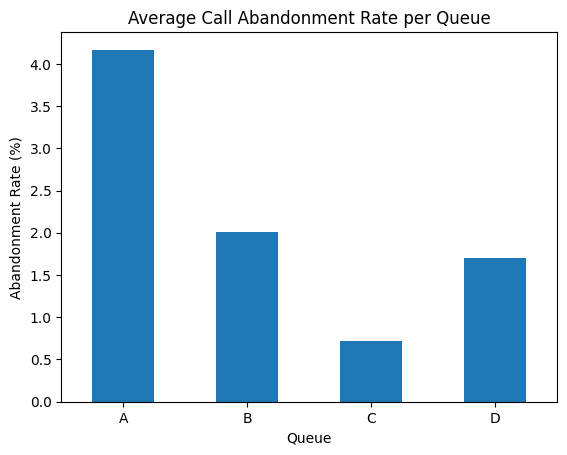

In [36]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt
import seaborn as sb
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

queue_abandonment_rate = df[df['Abandoned'] == True].groupby('Queue').size() / df.groupby('Queue').size() * 100
print(queue_abandonment_rate)

#Your code below:

queue_abandonment_rate.plot(kind='bar')

plt.xlabel('Queue')
plt.ylabel('Abandonment Rate (%)')
plt.title('Average Call Abandonment Rate per Queue')
plt.xticks(rotation=360)  # Rotate labels by 90 degrees

plt.show()

##### Record your answer below:

> Chart style you chose and why: I choose a bar chart.  This is an easy to read graph that clearly lays out the abandoment rate by queue.  

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

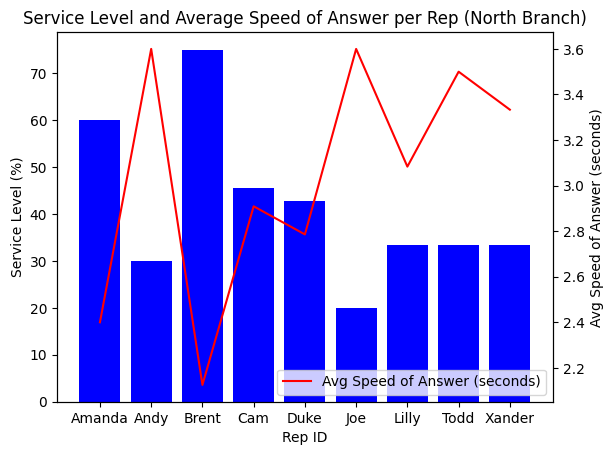

In [93]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = northcallcenter_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = northcallcenter_df[northcallcenter_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = northcallcenter_df[northcallcenter_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


#Your Code Here:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Create a second y-axis

# Plot service level as a bar chart
ax1.bar(service_level.index, service_level['Service Level %'], color='blue', label='Service Level (%)')

# Plot average speed of answer as a line chart
ax2.plot(north_plt.index, north_plt["Incoming Wait Time"], color='red', label='Avg Speed of Answer (seconds)')

# Set labels and title
ax1.set_xlabel('Rep ID')
ax1.set_ylabel('Service Level (%)')
ax2.set_ylabel('Avg Speed of Answer (seconds)')
plt.title('Service Level and Average Speed of Answer per Rep (North Branch)')

# Show the plot
plt.legend()
plt.show()


##### Record your answer below:

> Chart style you chose and why: The chart style I chose is a line and bar graph.  I chose this style to differeniate between the two different sets of data we are trying to see.  I chose for them to both have the same x axis as the data would be the same for each Rep Id.  Then I wanted to show each Rep's service level along the y1 axis and their avg speed along the y2 axis.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


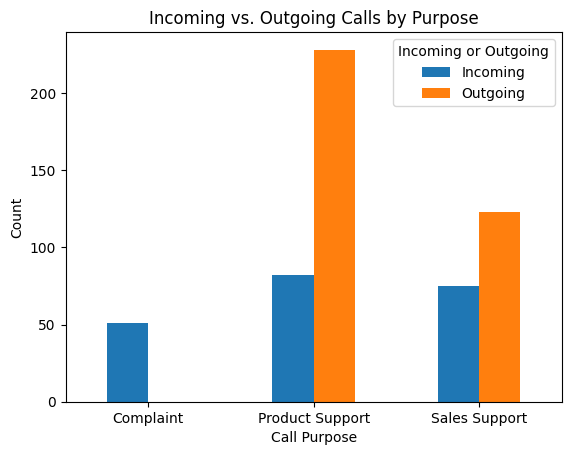

In [85]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

purpose_counts.unstack().plot(kind='bar', stacked=False)

plt.xlabel('Call Purpose')
plt.ylabel('Count')
plt.title('Incoming vs. Outgoing Calls by Purpose')
plt.xticks(rotation=360)

plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a double bar graph to show the number of incoming and outgoing calls by purpose.  This nicely shows each type of call by its purpose side by side.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: I would say that the South Call Center is operating more efficiently.  The South Center beats the North Center in all the measurements.  The South Center has a lower abandament rate, a higher service level and a quicker average speed to answer.  



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: I think the North Branch would benefit from the extra help.  They lag the South Branch in all KPI's.  This could be becuase they have 2 less reps working, thus causing employees to feel overworked.  This could lead to many issues and staffing turnover.  With some extra staff and training for lagging employees the North Branch could improve their numbers.  


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: No, I think there was a good quality of data and from this data you could come up with a lot of different metrics to look into the call center branches.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

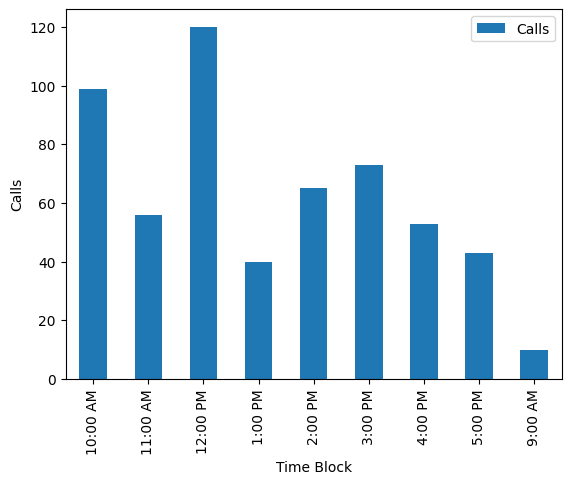

In [126]:
# Create your Bonus Mission visualization here!
call_times = combined_df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]


# Use groupby to plot based on time blocks:

group_data = call_times.groupby('Time Block').agg({'Calls' : 'sum'})

group_data.plot(kind='bar')
plt.xlabel('Time Block')
plt.ylabel('Calls')
plt.show()


# Use groupby and get_group to select which call purpose to plot:



